# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

**From .names file:
5. Number of Instances: 306

6. Number of Attributes: 4 (including the class attribute)

7. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute)
         1 = the patient survived 5 years or longer
         2 = the patient died within 5 year

8. Missing Attribute Values: None


In [1]:
## Import libraries
# File Handling
import wget
import os.path
from os import path

# Data
import pandas as pd
import numpy as np

In [2]:
## Get the data
def downloadFile(url, name=None):
    '''
    Check if file exists and download to working directory if it does not.
    '''
    split_url = url_split = url.split('/')
    filename = url_split[len(url_split)-1]
    
    if path.exists(filename):
        print('File already exists')
    else:
        try:
            filename = wget.download(url, out=name)
            print(filename, 'successfully downloaded')
        except:
            print('File could not be downloaded.  Check URL & connection.')
    return filename

filename = downloadFile("http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data", "haberman.data")

haberman.data successfully downloaded


In [6]:
## Load the local file into pandas
data = pd.read_csv(filename, skiprows=0, skipfooter=0)
print('Head', data.head())
print('Head', data.tail())


Head    30  64   1  1.1
0  30  62   3    1
1  30  65   0    1
2  31  59   2    1
3  31  65   4    1
4  33  58  10    1
Head      30  64  1  1.1
300  75  62  1    1
301  76  67  0    1
302  77  65  3    1
303  78  65  1    2
304  83  58  2    2


In [8]:
## Missing a row
print(306-len(data))

1


In [9]:
## Must manually add the header
columns = ['Age', 'Year', 'Nodes', 'S_Status']

## re-initialize pandas dataframe with correct header (to get row back)
data = pd.read_csv(filename, skiprows=0, skipfooter=0, header=None, names=columns)
print('Head', data.head())
print('Head', data.tail())

Head    Age  Year  Nodes  S_Status
0   30    64      1         1
1   30    62      3         1
2   30    65      0         1
3   31    59      2         1
4   31    65      4         1
Head      Age  Year  Nodes  S_Status
301   75    62      1         1
302   76    67      0         1
303   77    65      3         1
304   78    65      1         2
305   83    58      2         2


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [10]:
## First let's make sure there aren't any null values
for column in columns:
    print('Column', column)
    print(data[column].value_counts())

Column Age
52    14
54    13
50    12
47    11
53    11
43    11
57    11
55    10
65    10
49    10
38    10
41    10
61     9
45     9
42     9
63     8
59     8
62     7
44     7
58     7
56     7
46     7
70     7
34     7
48     7
37     6
67     6
60     6
51     6
39     6
66     5
64     5
72     4
69     4
40     3
30     3
68     2
73     2
74     2
36     2
35     2
33     2
31     2
78     1
71     1
75     1
76     1
77     1
83     1
Name: Age, dtype: int64
Column Year
58    36
64    31
63    30
66    28
65    28
60    28
59    27
61    26
67    25
62    23
68    13
69    11
Name: Year, dtype: int64
Column Nodes
0     136
1      41
2      20
3      20
4      13
6       7
7       7
8       7
5       6
9       6
13      5
14      4
11      4
10      3
15      3
19      3
22      3
23      3
12      2
20      2
46      1
16      1
17      1
18      1
21      1
24      1
25      1
28      1
30      1
35      1
52      1
Name: Nodes, dtype: int64
Column S_Status
1    225
2    

In [11]:
## Copy the dataset

df = data.copy()
df.head()

,Age,Year,Nodes,S_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [18]:
## We can do a little feature generation and bin the ages.  The survival status is already
## coded well, so that pandas.groupby() can be used to get some interesting tables

## Binning Age
def gen_labelrange(val, width, bins):
    '''
    val: integer to find bin label
    width: width of bin
    bins: number of bins

    Hopefully fast.  Takes the value to lookup, the width of the bin and # of bins.
    Creates a map and searches for the correct bin (float/integer values only).
    Returns a string with the range 'min-max' of bin.
    '''
    label_map = [[width*x, width*x+width-1] for x in range(bins)]
    
    for i in range(bins):
        if val <= label_map[i][1]:
            return ''.join([str(label_map[i][0]), '-',str(label_map[i][1])])
    
    return 'Out of Range'


df['age_range'] = df.Age.apply(gen_labelrange, width=10, bins=9)
df.head(10)

,Age,Year,Nodes,S_Status,age_range
0,30,64,1,1,30-39
1,30,62,3,1,30-39
2,30,65,0,1,30-39
3,31,59,2,1,30-39
4,31,65,4,1,30-39
5,33,58,10,1,30-39
6,33,60,0,1,30-39
7,34,59,0,2,30-39
8,34,66,9,2,30-39
9,34,58,30,1,30-39


In [25]:
## Check survival status against age range
pd.crosstab(df.S_Status, df.age_range)



age_range,30-39,40-49,50-59,60-69,70-79,80-89
S_Status,,,,,,
1,36,57,73,44,15,0
2,4,27,26,18,5,1


In [26]:
##  We can take that further by replacing counts with mean nodes for each combination
pd.crosstab(df.S_Status, df.age_range, values=df.Nodes, aggfunc='mean').round(0)

age_range,30-39,40-49,50-59,60-69,70-79,80-89
S_Status,,,,,,
1,4.0,3.0,3.0,2.0,2.0,NaN
2,8.0,8.0,9.0,7.0,2.0,2.0


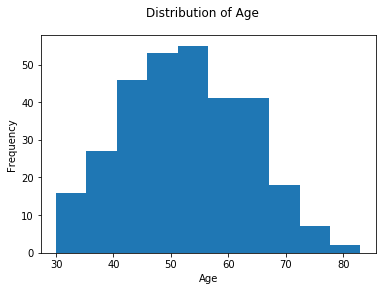

In [30]:
## This is great.  It's pretty apparent that at every age, more nodes is associated with increased mortality
## Just to make sure we aren't looking at a bad sample, let's check the distribution of age groups
import matplotlib.pyplot as plt

plt.hist(df['Age'])
plt.suptitle('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [33]:
## Age is normally distributed, which makes this a great dataset to mimic population, but means that we
## haven't enough data to check the relationship at each age group and compare them against each other. 

## Let's look at the crosstab again normalized
pd.crosstab(df.S_Status, df.age_range, values=df.Nodes, aggfunc='mean', normalize=True).round(2)

age_range,30-39,40-49,50-59,60-69,70-79,80-89
S_Status,,,,,,
1,0.08,0.06,0.06,0.05,0.04,0.00
2,0.16,0.16,0.18,0.14,0.03,0.04


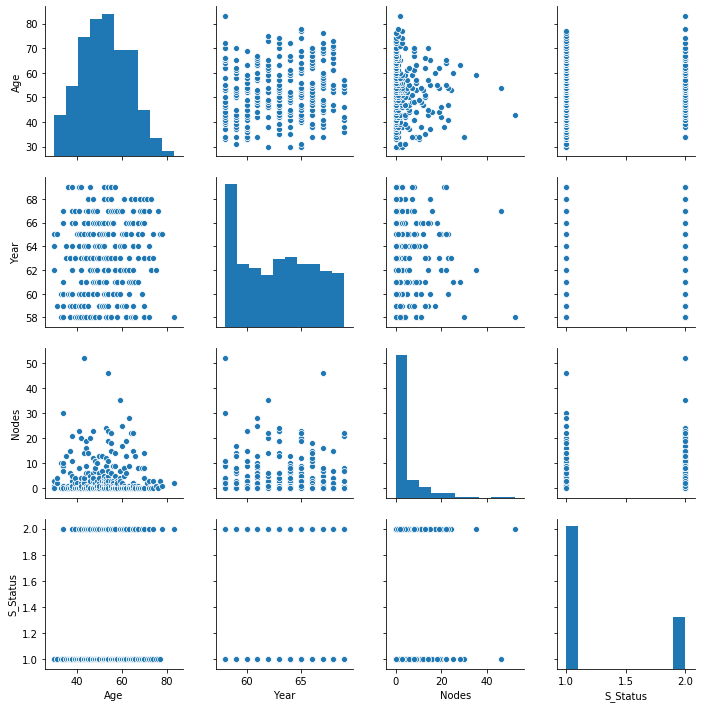

In [32]:
## A seaborn pairplot might yield some other interesting findings
import seaborn as sns

sns.pairplot(df)

Nodes       4.05
S_Status    1.10
dtype: float64
Nodes       4.321429
S_Status    1.321429
dtype: float64
Nodes       4.404040
S_Status    1.262626
dtype: float64
Nodes       3.709677
S_Status    1.290323
dtype: float64
Nodes       1.95
S_Status    1.25
dtype: float64
Nodes       2.0
S_Status    2.0
dtype: float64


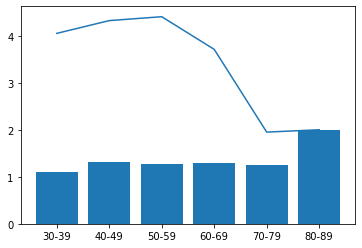

In [72]:
## Many of the plots are hard to read and would probably be better represented as cumulative frequency or stacked bars.
## The mirroring of age distribution and # of nodes suggests that you get more nodes simply by sampling the population at
## higher frequency.  This may indicate potential bias in the dataset.

## Quickly, let's look at a barchart of survival frequency at each range
df1 = df[['Nodes', 'S_Status', 'age_range']].groupby('age_range')
X = []
Y1 = []
Y2 = []
for key in df1.groups.keys():
    print(df1.get_group(key).mean())
    Y1.append(df1.get_group(key).mean()[0])
    Y2.append(df1.get_group(key).mean()[1])
    X.append(key)
    
plt.plot(X, Y1)
plt.bar(X, Y2)
plt.show()
    

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive relationship with survival?

**Being middle-aged seems to be dangerous.  But that may not hold up under better sampling.  One approach might be to randomly sample from each age group and test the mean node count for each, seeing if the relationship holds up. With only three hundred samples, that may be difficult.


- What is at least one feature that looks to have a negative relationship with survival?

**A lower number of nodes is seen in surviving groups of every age-range.  Higher node counts negatively correlate with likelihood of survival.  A logistic regression would better detail what we're seeing in the crosstab above.  It does appear that age has a relationship with survival separate from node count, but with so few sampes 10 < year < 40 and 70 < year < 100, I'm not sure how strong a relationship it is.   

- How are those two features related with each other, and what might that mean?

**Age and number of nodes have an exponential relationship that mirrors the age distribution.  There is likely significant bias due to middle age-group people being over represented int he dataset.

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.